In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-for-admission-in-the-university/adm_data.csv


## Table of Contents
* [Project Overview](#Project-Overview)

* [Preparing and Previewing Data](#Preparing-and-Previewing-Data)
    * [Import Data](#Import-Data)
    * [Data Cleaning](#Data-Cleaning)
    * [Data Preview](#Data-Preview)
    
    
* [Data Visualization](#Data-Visualization)
    * [Histogram](#Histogram)
    * [Seaborn Pairplot](#Seabor-Pairplot)
    * [Heatmap](#Heatmap)
    
    
* [Creating Training and Testing Datasets](#Creating-Training-and-Testing-Datasets)


* [Utilizing Regression Models: Training and Evaluation](#Utilizing-Regression-Models)
  * [Linear Regression Model](#Linear-Regression-Model)
  * [Artificial Neural Networks Model](#Artificial-Neural-Networks-Model)
  * [Decision Tree Regressor Model](#Decision-Tree-Regressor)
  * [Random Forest Regressor Model](#Random-Forest-Regressor)
  
  
* [Evaluating Key Performance Indicators (KPIs) for Regression Models](#Evaluating-Key-Performance-Indicators)

[Back to Table of Contents](#Table-of-Contents)
## Project Overview

Creating regression models to forecast the probability of gaining admission to a specific university.

* Input (X)
  * GRE Scores ( out of 340 )
  * TOEFL Scores ( out of 120 )
  * University Rating ( out of 5 )
  * Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
  * Undergraduate GPA ( out of 10 )
  * Research Experience ( either 0 or 1 ) 


* Output (y)
  * Chance of Admit ( ranging from 0 to 1 )
  
  
* Models
  * [Linear Regression Model](#Linear-Regression-Model)
  * [Artificial Neural Networks Model](#Artificial-Neural-Networks-Model)
  * [Decision Tree Regressor Model](#Decision-Tree-Regressor)
  * [Random Forest Regressor Model](#Random-Forest-Regressor)
  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Back to Table of Contents](#Table-of-Contents)
## Preparing and Previewing Data

### Import Data

The dataset comprises diverse information, such as GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research experience, and the likelihood of admission. It consists of a total of 400 entries.

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 ).

Dataset Link: https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

In [3]:
df = pd.read_csv('/kaggle/input/data-for-admission-in-the-university/adm_data.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Cleaning

In [4]:
df.drop('Serial No.', axis = 1,inplace = True)
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Check for Null Value

In [5]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Check for Duplicated Value

In [6]:
df.duplicated().sum()

0

### Data Preview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df.groupby(by='University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


### Summary
* As the University Rating increases from 1 to 5, the average GRE Score and TOEFL Score also increase. This indicates that higher-ranked universities tend to attract students with higher standardized test scores.

* Similarly, the average SOP, LOR, and CGPA increase as the University Rating goes up. This implies that students applying to higher-ranked universities tend to have stronger Statement of Purpose, Letter of Recommendation, and academic performance.

* The Research experience also shows a positive correlation with University Rating. Higher-ranked universities tend to have more students with research experience.

* The Chance of Admission also increases as the University Rating goes up, suggesting that higher-ranked universities have a more competitive admission process, and applicants with stronger profiles have a higher chance of getting admitted.

[Back to Table of Contents](#Table-of-Contents)
## Data Visualization

### Histogram

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

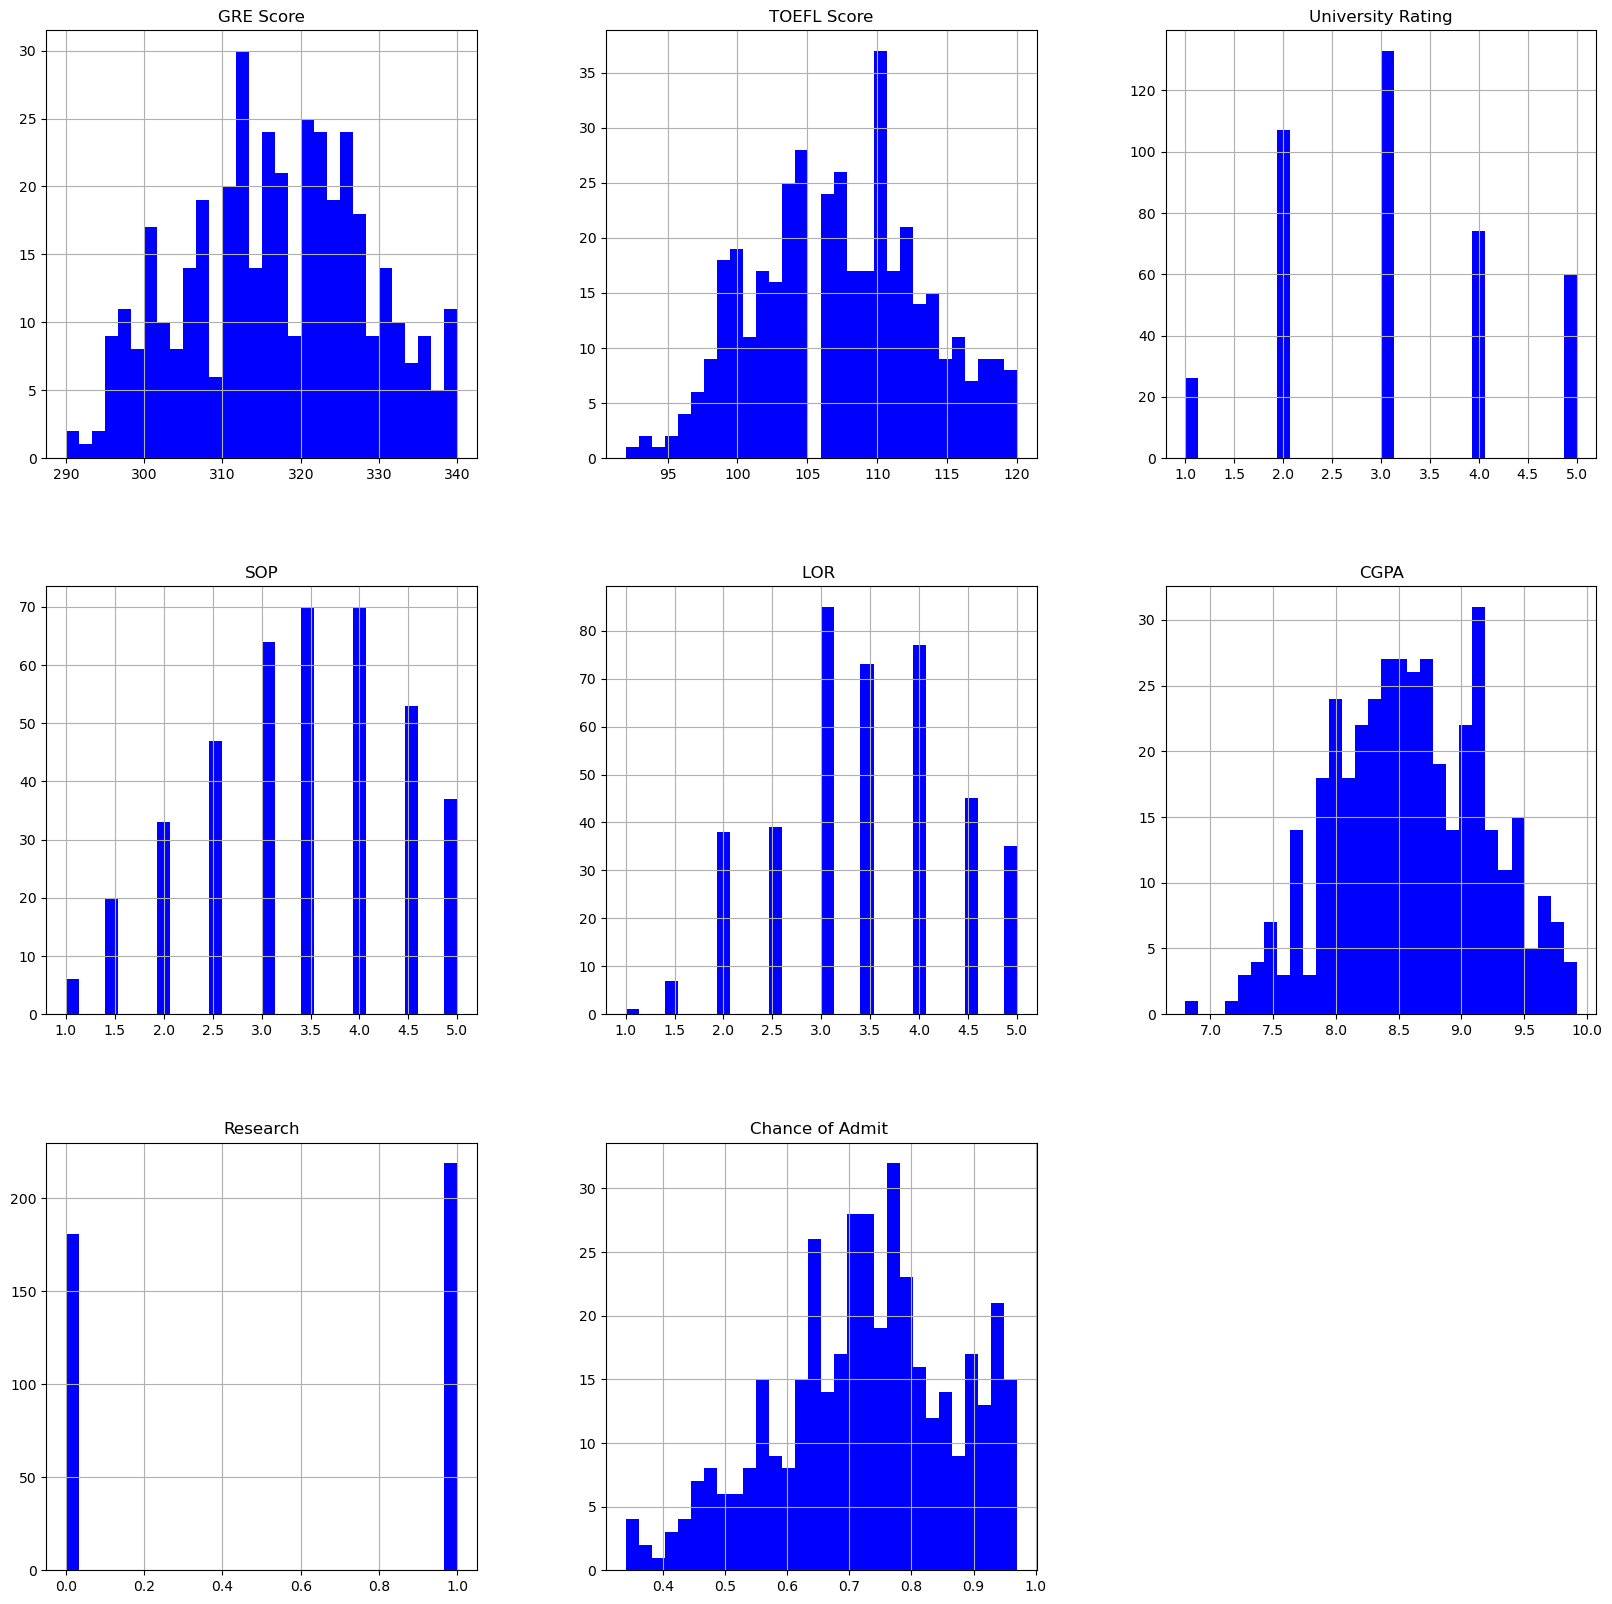

In [10]:
df.hist(bins = 30, figsize = (20,20), color = 'b')

### Seaborn Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


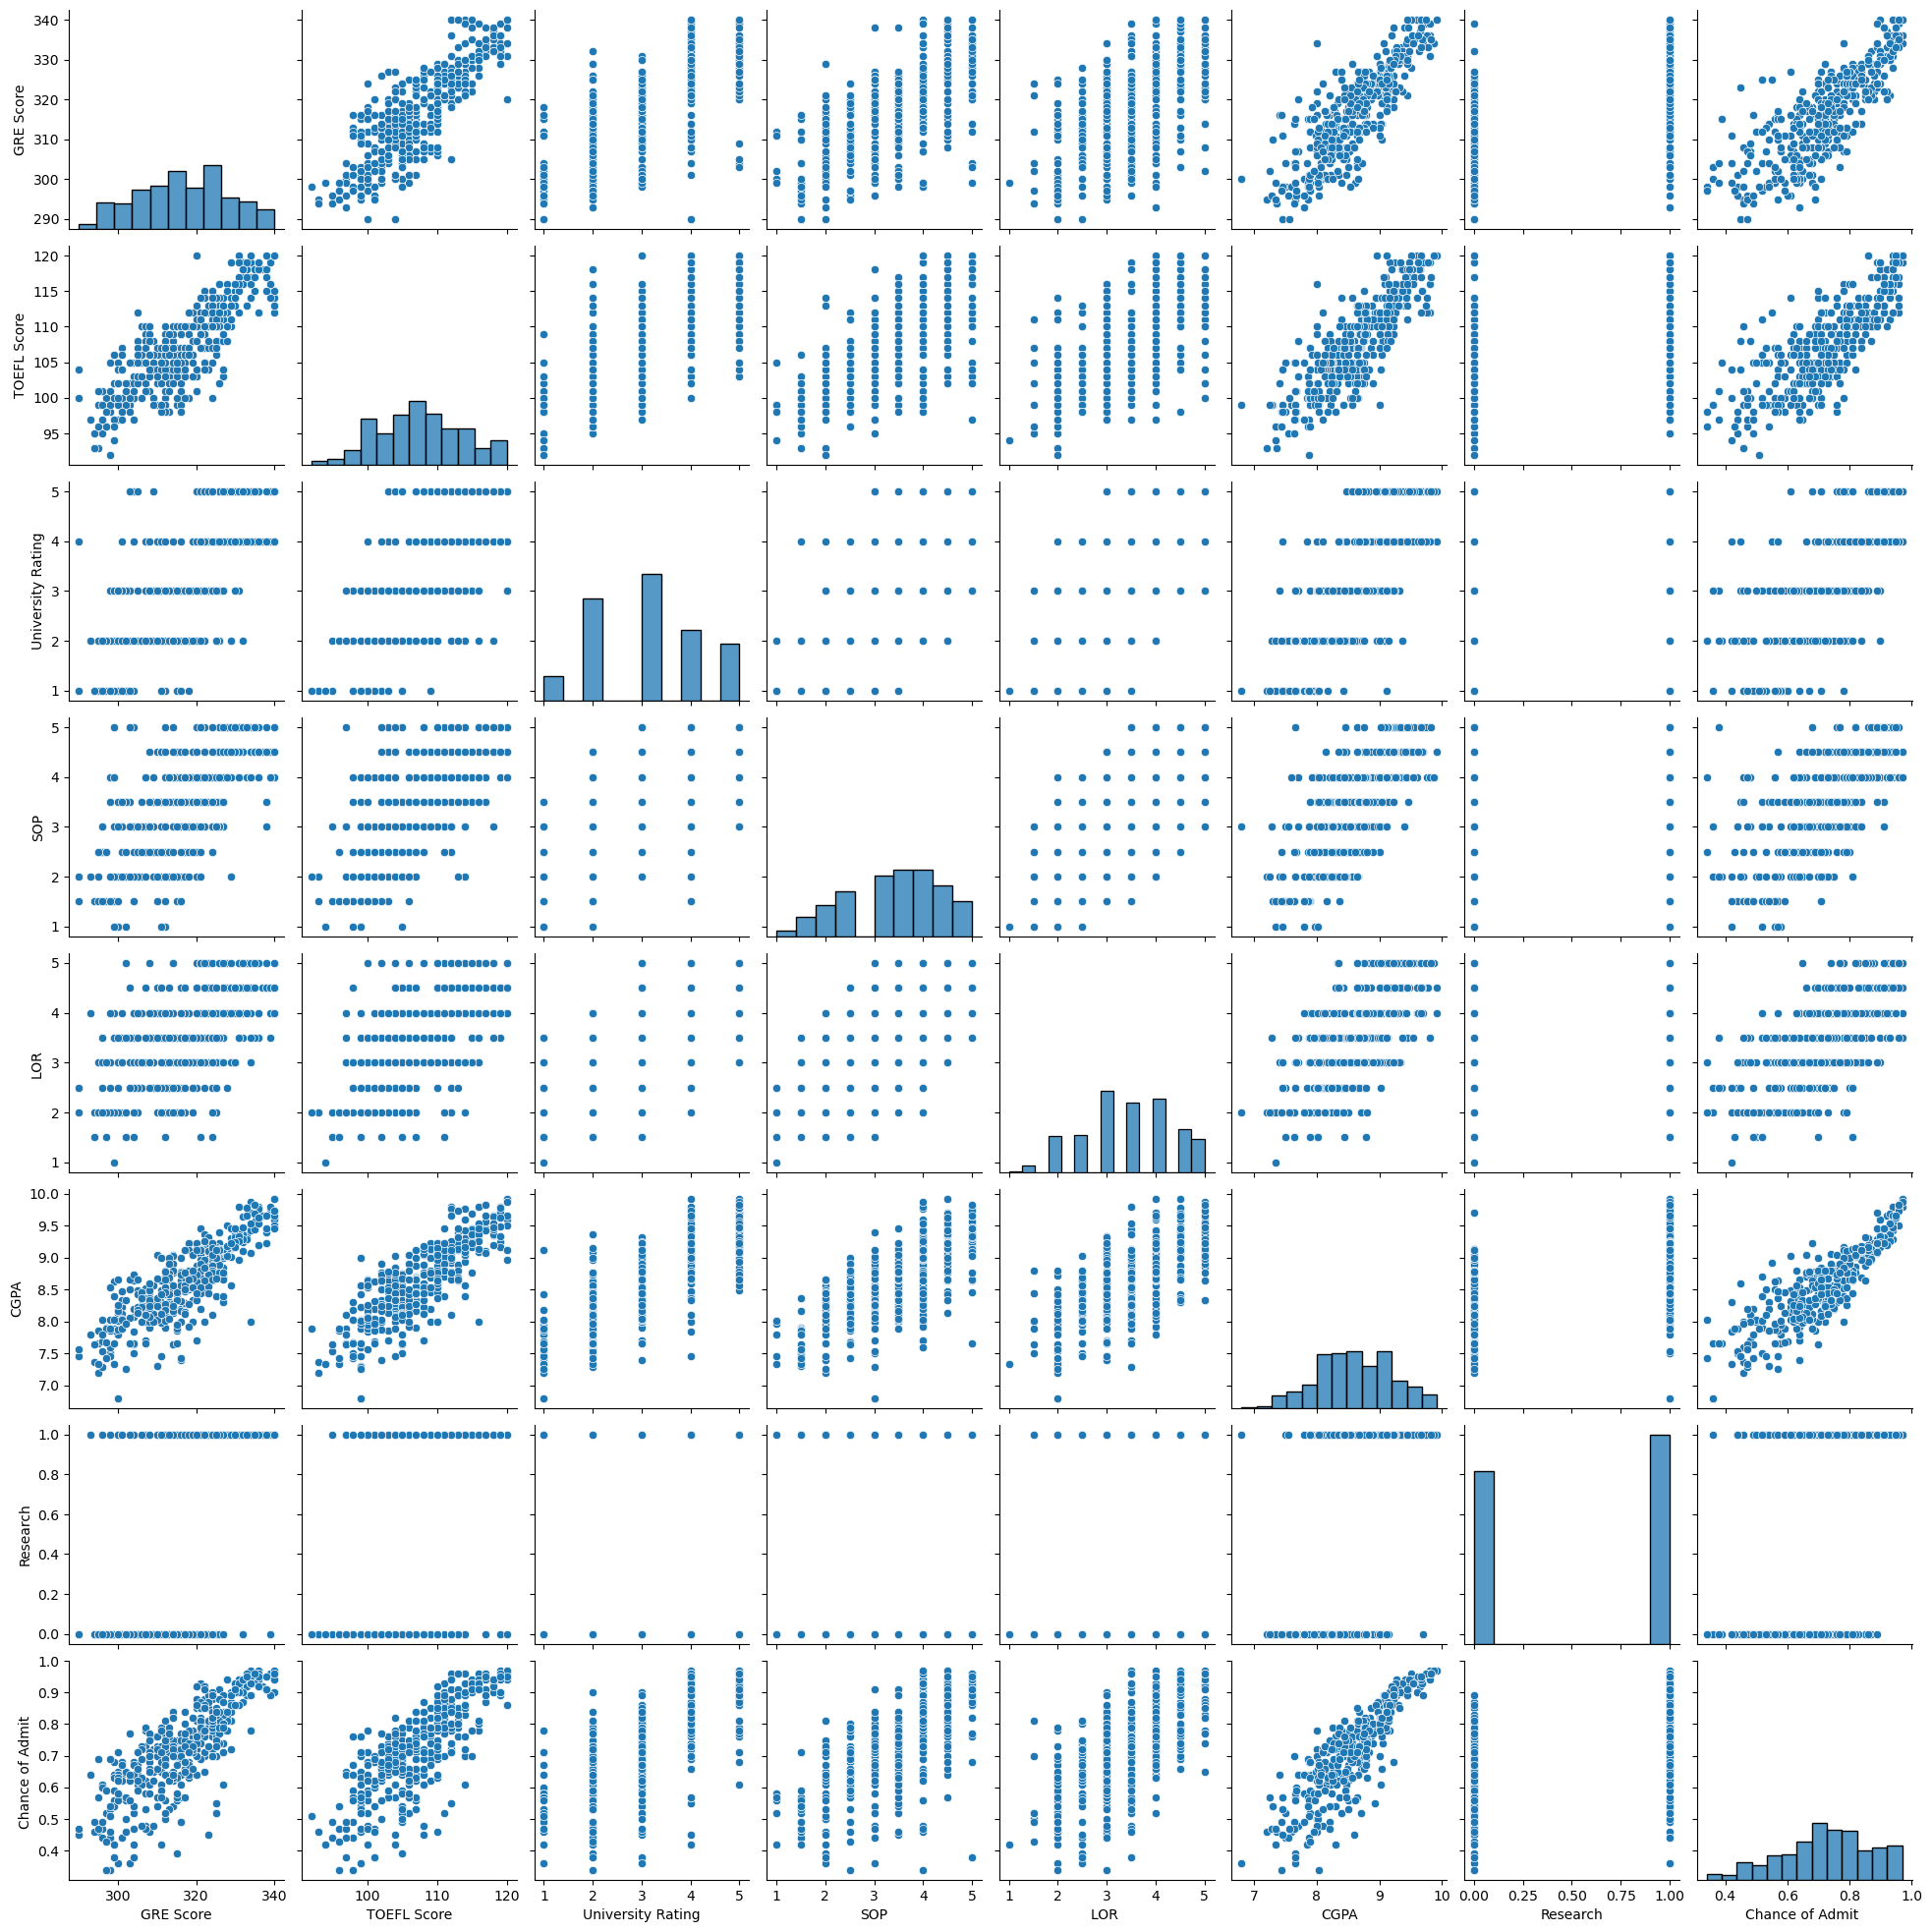

In [11]:
sns.pairplot(df)

In [12]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### Heatmap

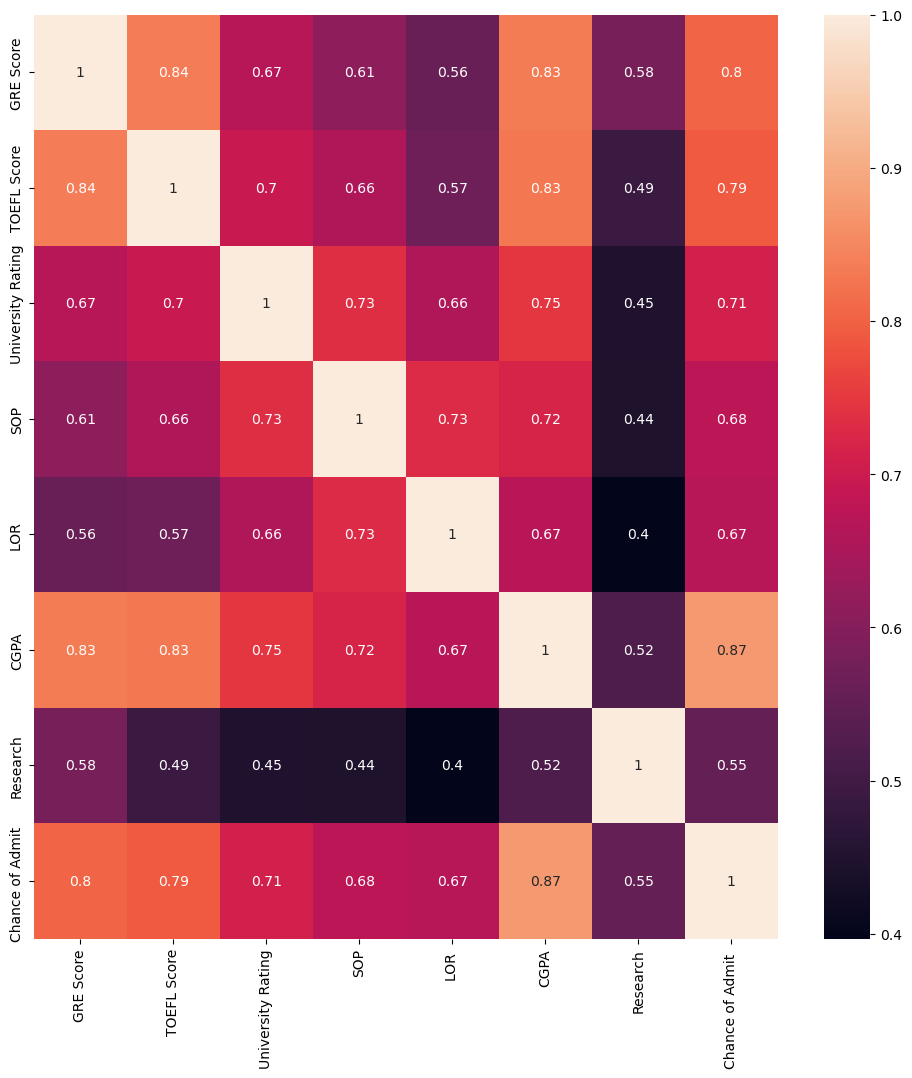

In [13]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Summary
* GRE Score and TOEFL Score are highly correlated with the chance of admission, with correlation coefficients of 0.802610 and 0.791594, respectively.
* CGPA also shows a strong positive correlation (0.873289) with the likelihood of admission.
* University Rating, SOP, and LOR have moderate positive correlations with chances of admission, ranging from 0.711250 to 0.675732.
* Research experience has a relatively lower positive correlation (0.553202) with the likelihood of admission compared to other factors.

[Back to Table of Contents](#Table-of-Contents)
## Creating Training and Testing Datasets

In [14]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
# Remove trailing whitespaces in the column name
df.columns = df.columns.str.strip()

In [16]:
X = df.drop(columns = ['Chance of Admit'])

In [17]:
y = df['Chance of Admit']

In [18]:
X.shape

(400, 7)

In [19]:
y.shape

(400,)

In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

In [21]:
X = np.array(X)
y = np.array(y)

Change y shape to (400,1)

In [22]:
y = y.reshape(-1,1)
y.shape

(400, 1)

### Data scaling

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [24]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

### Spliting the data into test and train sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

[Back to Table of Contents](#Table-of-Contents)
## Utilizing Regression Models

**Training and Evaluation**

### Linear Regression Model

Linear regression is a popular statistical technique used for modeling the relationship between a dependent variable (target) and one or more independent variables (features). Here are some factors, along with their pros and cons, when considering linear regression:

* Factors of Linear Regression:

    1. Simplicity: Linear regression is a simple and easy-to-understand modeling technique.

    2. Interpretability: The coefficients of the model have clear interpretations, showing the direction and magnitude of the impact of each feature on the target variable.

    3. Speed: Linear regression is computationally efficient, making it suitable for large datasets.

    4. Versatility: It can handle both numerical and categorical features with appropriate transformations.

    5. Assumptions: Linear regression relies on certain assumptions, including linearity, independence of errors, constant variance of errors (homoscedasticity), and normally distributed errors.

    6. Outliers: The presence of outliers in the data can significantly impact the model's performance.

    7. Multicollinearity: If independent variables are highly correlated, it can cause instability in coefficient estimates.

    8. Non-linearity: Linear regression may not capture complex non-linear relationships between features and the target.

    9. Heteroscedasticity: When the variance of errors is not constant, it violates a key assumption of linear regression.

    10. Extrapolation: Linear regression is not suitable for extrapolating beyond the range of the training data.

* Data that fits well with Linear Regression:

    Linear regression works well when the relationship between the dependent variable and the independent variables is approximately linear. Here are some cases where linear regression can be a good fit:

    1. Strong Linear Relationships: When the relationship between the target variable and the features can be approximated by a straight line.

    2. Single or Few Independent Variables: Linear regression can work well with a small number of features, especially when they have clear and interpretable effects on the target.

    3. Well-behaved Residuals: The errors should be normally distributed and have constant variance (homoscedasticity).

    4. Low Multicollinearity: The independent variables should not be highly correlated with each other.

    5. Data without Outliers: Linear regression is sensitive to outliers, so having a clean dataset without extreme values is preferable.

    6. Numerical Features: Linear regression is typically more suitable for datasets with numerical features, as it's straightforward to represent their relationships linearly.

#### Training Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [27]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

#### Evaluate Model

In [28]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8563409232495144

#### Predicting Values with Trained Models

In [29]:
def predict_chance_of_admit(new_data, model, scaler_x, scaler_y):
    # Convert new_data into a numpy array if it's not already
    new_data = np.array(new_data)

    # Scale the new data using the already fitted scaler_x object
    new_data_scaled = scaler_x.transform([new_data])

    # Predict the Chance of Admit for the new data point
    new_chance_of_admit_scaled = model.predict(new_data_scaled)

    # Inverse transform the scaled prediction to get the actual prediction
    new_chance_of_admit = scaler_y.inverse_transform(new_chance_of_admit_scaled)

    return new_chance_of_admit[0][0]


In [30]:
new_data_point = [324, 107, 4, 4, 4.5, 8.87, 1]
predicted_admission_chance = predict_chance_of_admit(new_data_point, LinearRegression_model, scaler_x, scaler_y)
print(f"Predicted Chance of Admit: {predicted_admission_chance}")

Predicted Chance of Admit: 0.8028293238300964


### Artificial Neural Networks Model

Artificial Neural Networks (ANNs) are a class of deep learning models inspired by the structure and function of biological neural networks. ANNs have gained tremendous popularity due to their ability to learn complex patterns and relationships from data. Here are some factors, along with their pros and cons, when considering an Artificial Neural Network model:

* Factors of Artificial Neural Networks:

    1. Non-linearity: ANNs can model complex non-linear relationships between features and the target, allowing them to capture intricate patterns in the data.

    2. Feature Representation: ANNs can automatically learn relevant feature representations from raw data, reducing the need for extensive feature engineering.

    3. Flexibility: ANNs can be adapted to various tasks, such as classification, regression, time-series forecasting, image recognition, and natural language processing.

    4. Scalability: They can handle large-scale datasets and can be trained on powerful hardware like GPUs and TPUs, making them suitable for big data problems.

    5. Multilayer Architecture: Deep neural networks, with multiple hidden layers, can learn hierarchical representations of the data, making them powerful for tasks requiring high-level abstractions.

    6. Overfitting: ANNs can be prone to overfitting when dealing with small datasets, complex architectures, or insufficient regularization.

    7. Training Complexity: Training deep neural networks can be computationally expensive and time-consuming, especially for complex models and large datasets.

    8. Hyperparameter Tuning: ANNs have various hyperparameters, such as learning rate, number of layers, and neurons per layer, which require tuning for optimal performance.

    9. Interpretability: The black-box nature of ANNs can make it challenging to interpret and understand how they arrive at their predictions.

* Data that fits well with Artificial Neural Networks:

    1. Large Datasets: ANNs tend to perform well when trained on large datasets, as they can learn more representative patterns from abundant data.

    2. Complex Relationships: When dealing with intricate and non-linear relationships between features and the target, ANNs have an advantage over linear models like linear regression.

    3. High-dimensional Data: ANNs can handle high-dimensional data, such as images, audio, and text, effectively extracting relevant features for the task.

    4. Unstructured Data: For tasks involving unstructured data, like image and speech recognition, ANNs, particularly convolutional neural networks (CNNs) and recurrent neural networks (RNNs), have shown remarkable performance.

    5. Transfer Learning: When there is a scarcity of labeled data for the target task, pre-trained ANN models can be fine-tuned on related tasks or datasets to boost performance.

ANNs can be very powerful and effective for a wide range of tasks, but they require careful tuning, substantial data, and computational resources. It's essential to consider the complexity of the problem, the amount of data available, and the interpretability requirements when deciding whether to use an ANN model.

#### Training Model

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [32]:
# Building netwoek

ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [33]:
# compiled model

ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [34]:
epochs_hist = ANN_model.fit(X_train,y_train,epochs = 100, batch_size = 20)

Epoch 1/100
17/17 [==============================] - 1s 3ms/step - loss: 0.6571
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4111
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3681
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3016
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 13/100
17/17 [=================

#### Evaluate Model

In [35]:
result = ANN_model.evaluate(X_test,y_test)
accuracy_ANN = 1 - result
print('Accuracy:{}'.format(accuracy_ANN))

2/2 [==============================] - 0s 4ms/step - loss: 0.3151
Accuracy:0.6849274039268494


In [36]:
epochs_hist.history.keys()

dict_keys(['loss'])

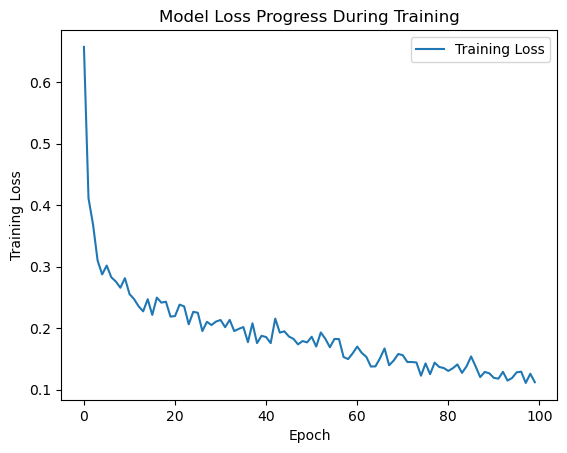

In [37]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

I managed to significantly decrease my error, reaching approximately 0.12 - 0.13 at this point.

#### Predicting Values with Trained Models

In [38]:
new_data_point = [324, 107, 4, 4, 4.5, 8.87, 1]
predicted_admission_chance = predict_chance_of_admit(new_data_point, ANN_model, scaler_x, scaler_y)
print(f"Predicted Chance of Admit: {predicted_admission_chance}")

1/1 [==============================] - 0s 119ms/step
Predicted Chance of Admit: 0.7938143610954285


### Decision Tree Regressor

Decision Tree Regressor are a type of machine learning model used for regression tasks. They work by recursively partitioning the data into subsets based on the values of the input features, and the target variable (dependent variable) in each partition is represented by the average (or another metric) of the target values of the data points within that partition. Here are some factors, along with their pros and cons, when considering a Decision Tree Regressor:

* Factors of Decision Tree Regressor:

    1. Interpretability: Decision Trees are easy to interpret and visualize, making them useful for understanding the decision-making process.

    2. Non-linearity: They can capture non-linear relationships between features and the target variable.

    3. Feature Importance: Decision Trees can provide information about the importance of different features in predicting the target variable.

    4. Robustness: They can handle both numerical and categorical features without requiring extensive data preprocessing.

    5. Handling Missing Values: Decision Trees can work with datasets containing missing values without the need for imputation.

    6. Overfitting: Decision Trees can be prone to overfitting, especially when they grow deep and complex.

    7. Instability: Small changes in the data can result in significantly different tree structures, leading to unstable predictions.

    8. Limited Extrapolation: Decision Trees are not well-suited for extrapolation outside the range of the training data.

    9. Bias: Decision Trees can be biased towards features with more levels, potentially impacting predictions.

* Data that fits well with Decision Tree Regressor:

    1. Non-linear Relationships: Decision Trees excel in capturing non-linear relationships in the data.

    2. Interpretable Models: Decision Trees are useful when model interpretability is crucial, as they provide easily understandable rules.

    3. Feature Importance: When you want to identify the most critical features affecting the target variable, Decision Trees can be valuable.

    4. Handling Categorical Data: Decision Trees can naturally handle categorical features without the need for one-hot encoding.

    5. Small to Medium-Sized Datasets: Decision Trees can work well with small to medium-sized datasets, as they are computationally efficient.

    6. Data Preprocessing: Decision Trees do not require extensive data preprocessing, making them suitable for some less structured datasets.

Decision Tree Regressor are powerful and straightforward models that can be a great choice for specific regression tasks. However, they may suffer from overfitting and instability, especially when growing too deep. Techniques like pruning, using ensemble methods (e.g., Random Forests, Gradient Boosting), or limiting the tree depth can help mitigate these issues and improve the model's performance.

#### Training Model

In [39]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

#### Evaluate Model

In [40]:
accuracy_DecisionTrss = DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTrss

0.5541524528802615

### Random Forest Regressor

The Random Forest Regressor is an ensemble machine learning model that combines the predictions of multiple decision tree regressors to make more accurate and robust predictions. It builds a "forest" of decision trees, where each tree is trained on a random subset of the data and a random subset of the features. Here are some factors, along with their pros and cons, when considering a Random Forest Regressor:

* Factors of Random Forest Regressor:

    1. Accuracy: Random Forest Regressors generally provide higher accuracy compared to individual decision tree regressors, especially on complex datasets.

    2. Non-linearity: Like decision trees, Random Forests can effectively capture non-linear relationships between features and the target variable.

    3. Robustness: They are less prone to overfitting compared to single decision trees due to the averaging of multiple trees' predictions.

    4. Stability: Random Forests are less sensitive to small changes in the training data, making them more stable.

    5. Feature Importance: They can provide a feature importance ranking, indicating which features have the most significant impact on the target variable.

    6. Handling Missing Data: Random Forests can handle missing values in the data without requiring explicit imputation.

    7. Handling Mixed Data Types: Random Forests can handle both numerical and categorical features, making them versatile for various types of data.

    8. Computational Efficiency: While Random Forests are more computationally intensive than individual decision trees, they can still efficiently process moderate-sized datasets.

    9. Interpretability: While individual decision trees are interpretable, the ensemble nature of Random Forests makes them less interpretable.

* Data that fits well with Random Forest Regressor:

    1. Complex Relationships: Random Forest Regressors perform well on datasets with complex and non-linear relationships between features and the target variable.

    2. Large Datasets: Random Forests can efficiently handle large datasets due to their ability to parallelize the training of individual trees.

    3. High-dimensional Data: They can handle high-dimensional data and feature spaces effectively.

    4. Handling Noise: Random Forests can handle noisy data and outliers due to the averaging effect of multiple trees.

    5. Prediction Confidence: If you need to estimate prediction uncertainty, Random Forests can provide an indication of the model's confidence through variance estimation.

Random Forest Regressors are widely used and a popular choice for regression tasks, particularly when the dataset is complex and there is a need for improved accuracy and robustness. However, they may not be the best choice for tasks where interpretability is a top priority, as the ensemble nature makes them less transparent compared to individual decision trees. For interpretable models, decision trees or simpler models like linear regression may be preferred.

#### Training Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth = 10)
RandomForest_model.fit(X_train,y_train)

/tmp/ipykernel_20/2067927171.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=10)

#### Evaluate Model

In [42]:
accuracy_Randomforest = RandomForest_model.score(X_test,y_test)
accuracy_Randomforest

0.8276802199837168

[Back to Table of Contents](#Table-of-Contents)
<a id="Evaluating-Key-Performance-Indicators"></a>
## Evaluating Key Performance Indicators (KPIs) for Regression Models

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
def evaluate_model(model_name, model, X_test, y_test, scaler_y=None):
    y_predict = model.predict(X_test)

    # If the model uses a scaler, inverse transform the predictions and true labels
    if scaler_y is not None:
        y_predict_orig = scaler_y.inverse_transform(y_predict.reshape(-1, 1))
        y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    else:
        y_predict_orig = y_predict
        y_test_orig = y_test

    plt.plot(y_test_orig, y_predict_orig, "^", color='r')
    plt.xlabel('Model Predictions')
    plt.ylabel('True Values')

    k = X_test.shape[1]
    n = len(X_test)

    RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
    MSE = mean_squared_error(y_test_orig, y_predict_orig)
    MAE = mean_absolute_error(y_test_orig, y_predict_orig)
    r2 = r2_score(y_test_orig, y_predict_orig)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print('Model:', model_name)
    print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


Model: Linear Regression
RMSE = 0.054 
MSE = 0.0028870526169759558 
MAE = 0.04052124481480278 
R2 = 0.8563409232495143 
Adjusted R2 = 0.8370022013792566


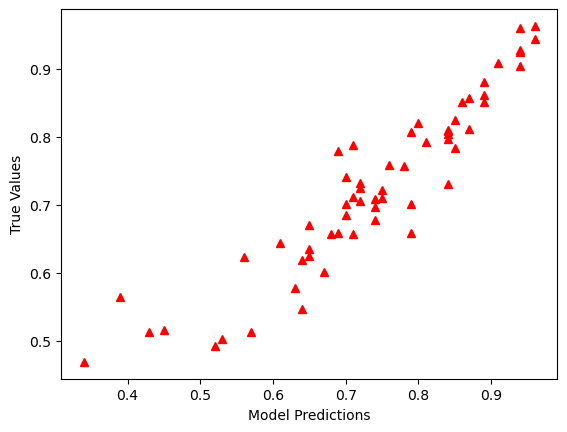

In [44]:
evaluate_model('Linear Regression', LinearRegression_model, X_test, y_test, scaler_y)

2/2 [==============================] - 0s 3ms/step
Model: Artificial Neural Network
RMSE = 0.08 
MSE = 0.006391743858386492 
MAE = 0.05970713625351587 
R2 = 0.6819482900581171 
Adjusted R2 = 0.6391336367967098


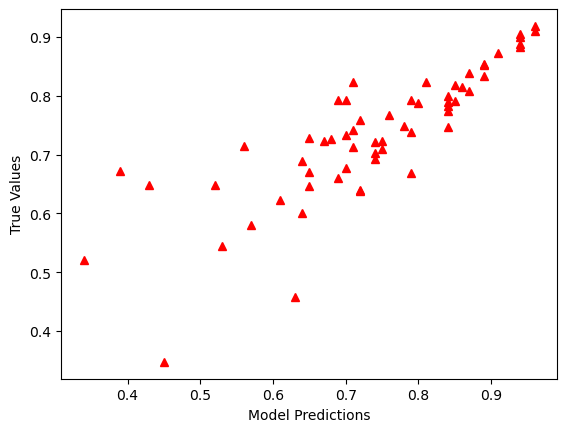

In [45]:
evaluate_model('Artificial Neural Network', ANN_model, X_test, y_test, scaler_y)

Model: Decision Tree
RMSE = 0.095 
MSE = 0.00896 
MAE = 0.06699999999999999 
R2 = 0.5541524528802615 
Adjusted R2 = 0.49413451384491214


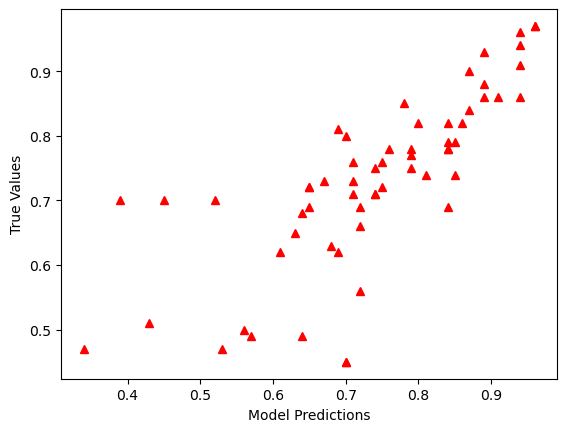

In [46]:
evaluate_model('Decision Tree', DecisionTree_model, X_test, y_test, scaler_y)

Model: Random Forest
RMSE = 0.059 
MSE = 0.0034630340324183504 
MAE = 0.04416232854168918 
R2 = 0.8276802199837167 
Adjusted R2 = 0.8044833265199862


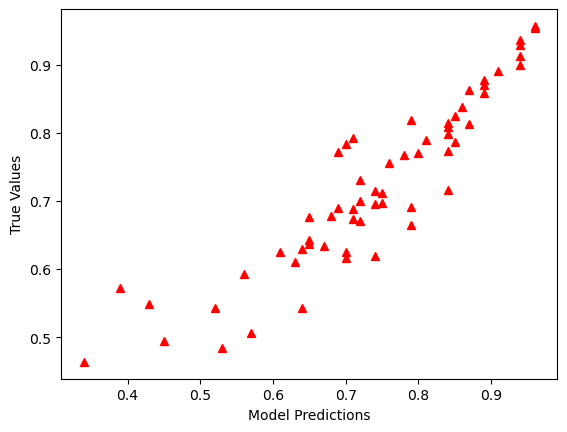

In [47]:
evaluate_model('Random Forest', RandomForest_model, X_test, y_test, scaler_y)

### Summary
1. Linear Regression:

    * RMSE: 0.062
    * MSE: 0.003797945841537671
    * MAE: 0.04487537930789891
    * R2: 0.7538290557886751
    * Adjusted R2: 0.7206906594525352

2. Artificial Neural Network:

    * RMSE: 0.071
    * MSE: 0.004970564690645331
    * MAE: 0.05204892921447755
    * R2: 0.6778235777411108
    * Adjusted R2: 0.6344536747447219

3. Decision Tree:

    * RMSE: 0.097
    * MSE: 0.00933333333333333
    * MAE: 0.06699999999999999
    * R2: 0.39504259008193954
    * Adjusted R2: 0.3136060156698929

4. Random Forest:

    * RMSE: 0.066
    * MSE: 0.004408615714541926
    * MAE: 0.04758560257418549
    * R2: 0.714247348857856
    * Adjusted R2: 0.6757806458194905


* The Linear Regression model outperforms the other three models in terms of RMSE, MSE, MAE, and R2 scores. It has the lowest RMSE, indicating that its predictions are closer to the actual values on average. The lowest MSE and MAE scores further support its better predictive accuracy.
* The Artificial Neural Network (ANN) performs slightly worse than Linear Regression but still provides decent results. It has higher RMSE, MSE, and MAE compared to Linear Regression but exhibits a reasonable R2 score.
* The Decision Tree model performs significantly worse than both Linear Regression and ANN, as evident from its higher RMSE, MSE, and MAE values. The R2 and Adjusted R2 scores are also considerably lower, indicating a poor fit to the data.
* The Random Forest model shows competitive performance, with an RMSE, MSE, and MAE close to that of Linear Regression. Its R2 and Adjusted R2 scores are also reasonably good, suggesting a relatively strong fit to the data.

Considering the overall results, the Linear Regression model appears to be the best choice among the given models for this specific dataset.